In [1]:
# ssh with forwarding
# conda
# notebook with port
# jupytext

In [2]:
from fastai.vision.all import *

In [3]:
path = untar_data(URLs.MNIST)
path.ls()
# Explore the directory of the downloaded data
# tree -d
# find testing/ -name '*.png' | wc -l

(#3) [Path('/home/CAMPUS/ajcd2020/.fastai/data/mnist_png/testing'),Path('/home/CAMPUS/ajcd2020/.fastai/data/mnist_png/day1-inclass.pkl'),Path('/home/CAMPUS/ajcd2020/.fastai/data/mnist_png/training')]

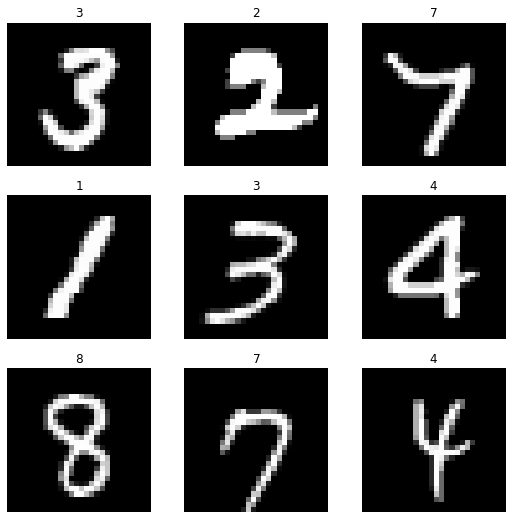

In [4]:
dls = ImageDataLoaders.from_folder(path, train="training", valid="testing")
dls.show_batch()

In [5]:
dls.valid_ds

(#10000) [(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(0))...]

In [6]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(1)
# What is random accuracy?
# What is with the number in brackets? (batch size)

/opt/mambaforge/envs/cs152/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /tmp/pip-req-build-pma2oi4d/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,accuracy,time
0,0.675630,0.446135,0.859100,00:33


epoch,train_loss,valid_loss,accuracy,time
0,0.104951,0.058485,0.981100,00:35


In [7]:
help(cnn_learner)

Help on function cnn_learner in module fastai.vision.learner:

cnn_learner(dls, arch, normalize=True, n_out=None, pretrained=True, config=None, loss_func=None, opt_func=<function Adam at 0x7f18e5351670>, lr=0.001, splitter=None, cbs=None, metrics=None, path=None, model_dir='models', wd=None, wd_bn_bias=False, train_bn=True, moms=(0.95, 0.85, 0.95), cut=None, n_in=3, init=<function kaiming_normal_ at 0x7f18f416daf0>, custom_head=None, concat_pool=True, lin_ftrs=None, ps=0.5, first_bn=True, bn_final=False, lin_first=False, y_range=None)
    Build a convnet style learner from `dls` and `arch`



In [8]:
?cnn_learner

In [9]:
doc(cnn_learner)

In [10]:
doc(ImageDataLoaders.from_folder)

In [11]:
image_files = get_image_files(path/"testing")
image_files

(#10000) [Path('/home/CAMPUS/ajcd2020/.fastai/data/mnist_png/testing/0/4515.png'),Path('/home/CAMPUS/ajcd2020/.fastai/data/mnist_png/testing/0/194.png'),Path('/home/CAMPUS/ajcd2020/.fastai/data/mnist_png/testing/0/1218.png'),Path('/home/CAMPUS/ajcd2020/.fastai/data/mnist_png/testing/0/845.png'),Path('/home/CAMPUS/ajcd2020/.fastai/data/mnist_png/testing/0/3346.png'),Path('/home/CAMPUS/ajcd2020/.fastai/data/mnist_png/testing/0/3368.png'),Path('/home/CAMPUS/ajcd2020/.fastai/data/mnist_png/testing/0/6921.png'),Path('/home/CAMPUS/ajcd2020/.fastai/data/mnist_png/testing/0/8468.png'),Path('/home/CAMPUS/ajcd2020/.fastai/data/mnist_png/testing/0/997.png'),Path('/home/CAMPUS/ajcd2020/.fastai/data/mnist_png/testing/0/8127.png')...]

In [12]:
learn.predict(image_files[0])

('0',
 tensor(0),
 tensor([9.9978e-01, 8.7871e-07, 8.3799e-07, 2.6191e-07, 1.0259e-06, 4.9321e-06,
         7.5731e-05, 1.1082e-05, 6.7081e-07, 1.2694e-04]))

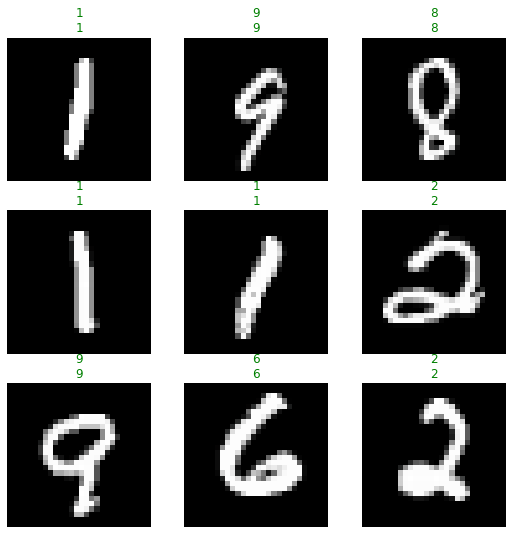

In [13]:
learn.show_results()

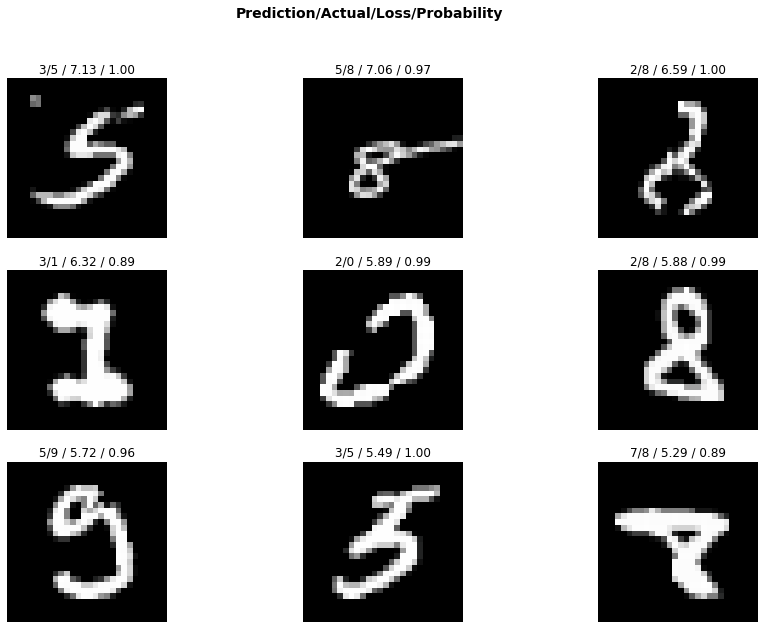

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15, 10))

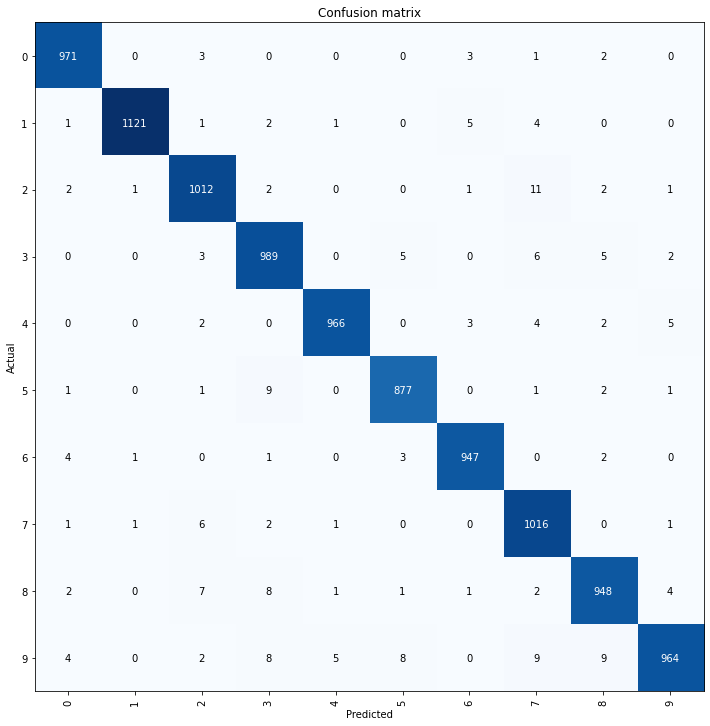

In [15]:
interp.plot_confusion_matrix(figsize=(10, 10))

In [16]:
learn.export("day1.pkl")